<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

### Problem 1
Implement serial test and apply to a `samples`

In [4]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = [rng() for _ in range(1000)]











points=[(samples[i-1],samples[i]) for i in range(1, len(samples))[::2]]

x=[points[i][0] for i in range(len(points)) ]
y=[points[i][1] for i in range(len(points)) ]

k=20
f_obs=np.histogram2d(x,y,bins=[k,k])[0]

per_bin = len(points) / (k * k)
f_exp = np.full(k*k, per_bin)

stats.chisquare(f_obs.flatten(),f_exp)




Power_divergenceResult(statistic=np.float64(386.40000000000003), pvalue=np.float64(0.6653662117152015))

### Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

### Problem 2*
Implement permutation test and apply to a `samples`

In [ ]:
# Your code here

The choice of parameters $m$, $a$ and $c$ has a significant impact on the quality of the sequence. If the parameters are chosen unsuccessfully, it can lead to unexpected consequences:

In [ ]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

The histogram of the distribution is similar to a uniform distribution:

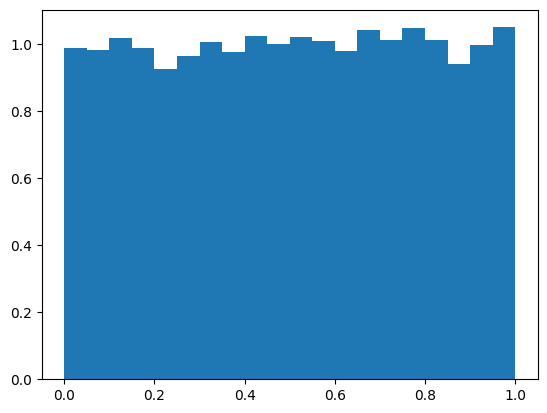

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.hist(random, 20, density=True)
plt.show()

However, the series test shows that the points are located on hyperplanes, which does not fit well with the notion of randomness:

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [5]:
from scipy import stats
import numpy as np

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random_bad = [rng_bad() for _ in range(30000)]

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for _ in range(30000)]

a=stats.kstest(random, stats.uniform.cdf)
b=stats.kstest(random_bad, stats.uniform.cdf)
print(a)
print(b)

KstestResult(statistic=np.float64(0.005309841797252524), pvalue=np.float64(0.3648538790388741), statistic_location=np.float64(0.29232349153608084), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.008437018050998446), pvalue=np.float64(0.027777953265237354), statistic_location=np.float64(0.41213701805099845), statistic_sign=np.int8(-1))


* More randomness tests - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).
* More methods for generating a uniform value [here](https://en.wikipedia.org/wiki/List_of_random_number_generators).
* A story about dynamical systems and the transition to chaos https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

# Generating a sample from a given distribution

Suppose we have a random number generator from the segment [0, 1] (use the `np.random.rand()` function for this). How to get a sample from another distribution $F$?

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

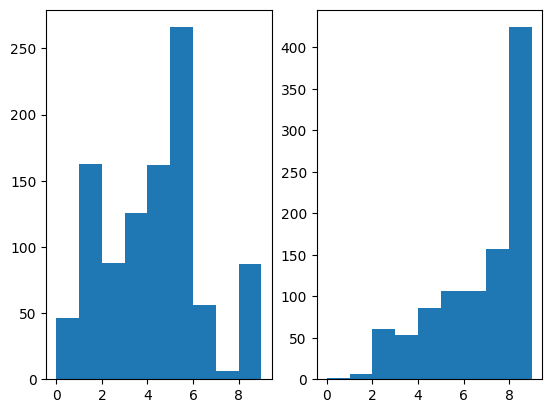

In [6]:
import numpy as np
import matplotlib.pyplot as plt
values=np.arange(0,10,1)

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights = weights/weights.sum()

random = np.random.choice(values, size=1000, p=weights)

weights_sort = np.sort(weights)

random_sort = np.random.choice(values, size=1000, p=weights_sort)
plt.subplot(1, 2, 1)
plt.hist(random, values)
plt.subplot(1, 2, 2)
plt.hist(random_sort, values)
plt.show()

## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

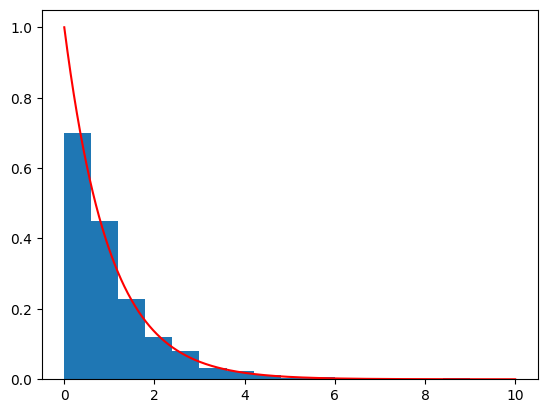

In [7]:
import numpy as np
import matplotlib.pyplot as plt
ravnomer = np.random.rand(1000)
exponent = -np.log(1-ravnomer)
x = np.linspace(0, 10, 1000)
y = np.exp(-x)
plt.hist(exponent, density=True, bins=15)
plt.plot(x,y, color='red')
plt.show()




## Rejection sampling (Accept-reject method)

The idea of the method is to sample from the distribution we know how to sample from, and then select points that follow the desired distribution. More precisely: let's say we know how to sample from a distribution with density $p$, and we want to sample from a distribution with density $\pi$. Let's take a random $x$ from the distribution $p$. Then take $y$ uniformly distributed on the interval $[0, p(x)]$. If the point $(x, y)$ falls under the graph of $\pi$, we take $x$ as a sampling element from $\pi$. If not, we repeat the procedure for a new $x$. The picture illustrates the idea of the method (the densities are normalised so that one lies entirely under the other):

<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

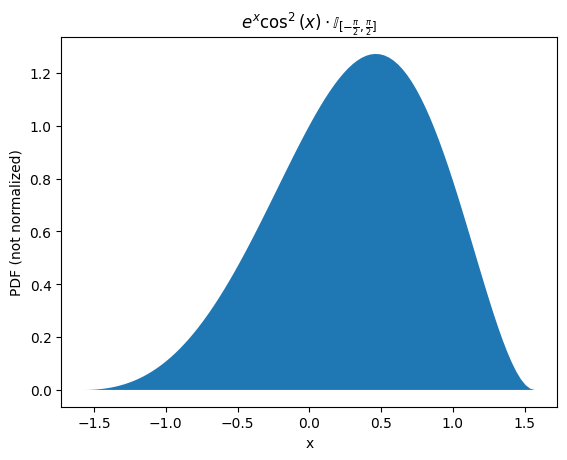

In [8]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

Normalization constant C = 1.841


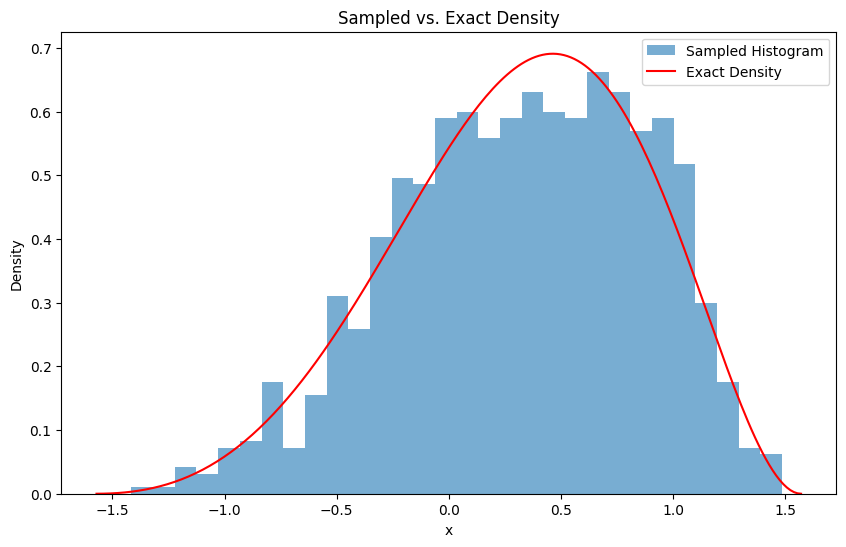

In [9]:
from scipy.integrate import quad

def integrand(x):
    return np.exp(x) * (np.cos(x))**2

C, _ = quad(integrand, -np.pi/2, np.pi/2)
print(f"Normalization constant C = {C:.3f}")

def exact_density(x):
    return np.exp(x) * (np.cos(x))**2 / C

samples = []
num_accepted = 0

while num_accepted < 1000:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    u = np.random.uniform(0, 1)
    if u <= np.exp(x) * (np.cos(x))**2:
        samples.append(x)
        num_accepted += 1


plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Sampled Histogram')

x = np.linspace(-np.pi/2, np.pi/2, 200)
y = exact_density(x)
plt.plot(x, y, 'r-', label='Exact Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Sampled vs. Exact Density')
plt.legend()
plt.show()

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

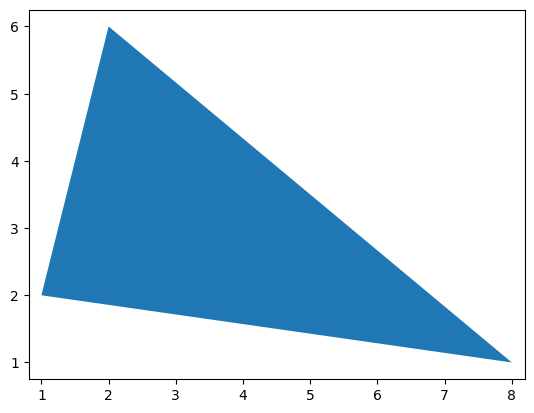

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

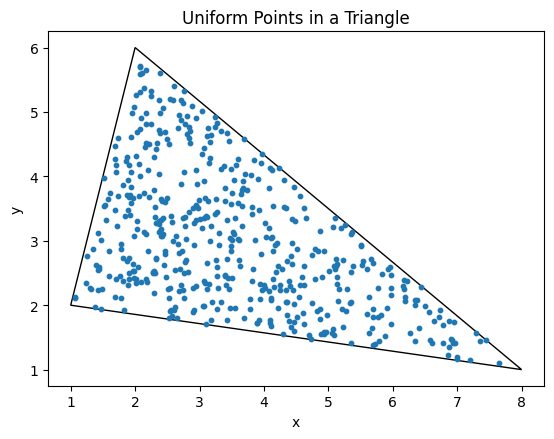

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

vertices = np.array([[1, 2], [2, 6], [8, 1]])

def uniform_triangle_sample(vertices, num_points):
    u = np.random.uniform(0, 1, num_points)
    v = np.random.uniform(0, 1, num_points)

    x = (1 - np.sqrt(u))*vertices[0, 0] + np.sqrt(u)*(1 - v)*vertices[1, 0] + np.sqrt(u)*v* vertices[2, 0]
    y = (1 - np.sqrt(u))*vertices[0, 1] + np.sqrt(u) * (1 - v)*vertices[1, 1] + np.sqrt(u)*v*vertices[2, 1]
    return np.column_stack((x, y))

points = uniform_triangle_sample(vertices, 500)

fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True, edgecolor='black', facecolor='none')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=10)
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform Points in a Triangle')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

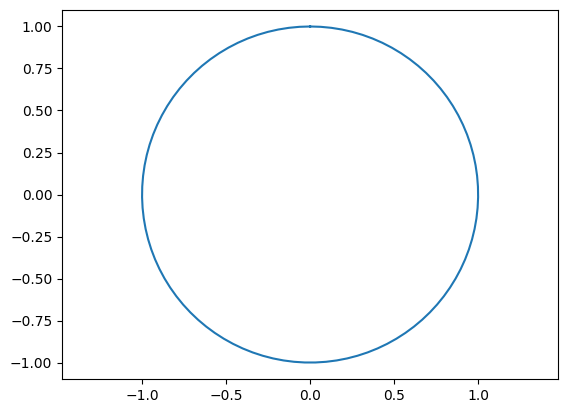

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

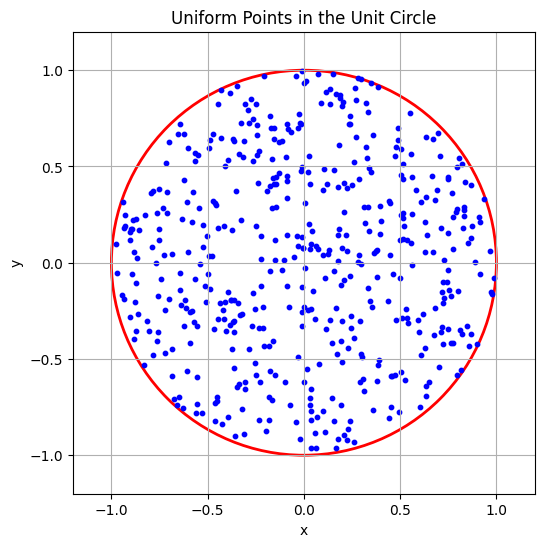

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy import stats

def uniform_unit_circle_sample(num_points):
    u = np.random.uniform(0, 1, num_points)
    r = np.sqrt(u)
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

x, y = uniform_unit_circle_sample(500)

plt.figure(figsize=(6, 6))


circle = Circle((0, 0), 1, facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(circle)


plt.scatter(x, y, s=10, color='blue')
plt.gca().set_aspect('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.title('Uniform Points in the Unit Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



# Random normal generator

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

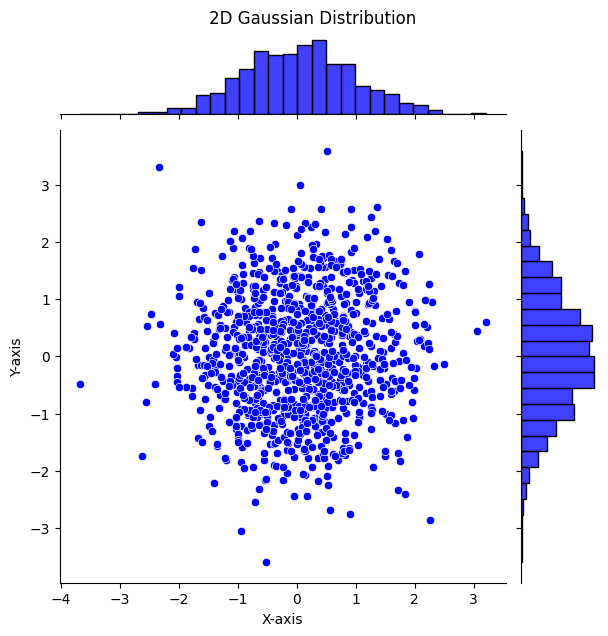

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

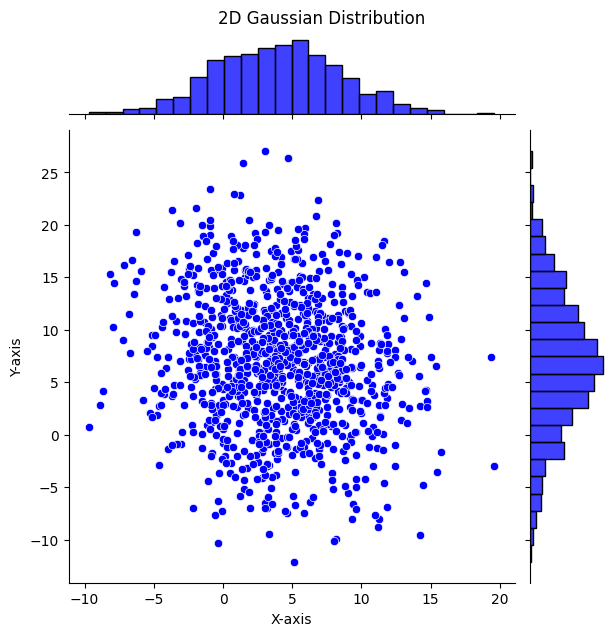

Mean coord. differences: [0.02805876 0.08498695]
Covariance coord. differences:
 [[0.56954209 0.0107491 ]
 [0.0107491  0.93044313]]


In [20]:
import seaborn as sns

mu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

L = np.linalg.cholesky(sigma)

def generate_normal_samples(n):
    samples = []
    while len(samples) < n:
        U1 = np.random.uniform(-1,1)
        U2=np.random.uniform(-1,1)
        S = U1**2 + U2**2
        if 0 < S < 1:
            factor = np.sqrt(-2 *np.log(S)/S)
            samples.append(U1*factor)
            samples.append(U2*factor)
    return np.array(samples[:n])

Z = np.column_stack((generate_normal_samples(1000), generate_normal_samples(1000)))

#еransform standard normal samples to the given gaussian distribution
X = (L @ Z.T).T + mu
joint_plot = sns.jointplot(x=X[:, 0], y=X[:, 1], color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X.T)

print("Mean coord. differences:", np.abs(sample_mean-mu))
print("Covariance coord. differences:\n", np.abs(sample_cov-sigma))

### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
# Your code here

# Basic distributions
- **Uniform distribution $\operatorname{U}[a, b]$**:
$$p(x) = \frac{1}{b-a}\cdot\mathbb{I}_{x\in[a, b]}$$

- **Exponential distribution $\operatorname{Exp}(\lambda)$**:
$$p(x) = \lambda e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Normal distribution $\mathcal{N}(\mu, \sigma^2)$**:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- **Gamma distribution $\operatorname{Gamma}(\alpha, \lambda)$**:
$$p(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}\cdot\mathbb{I}_{x\geqslant0}$$

- **Beta distribution $\operatorname{Beta}(\alpha, \beta)$**:
$$p(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}\cdot\mathbb{I}_{x\in[0, 1]}$$

- **$\chi^2$ distribution with $k$ degrees of freedom $\chi^2(k)$**:
$$p(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}\cdot\mathbb{I}_{x\geqslant0}$$



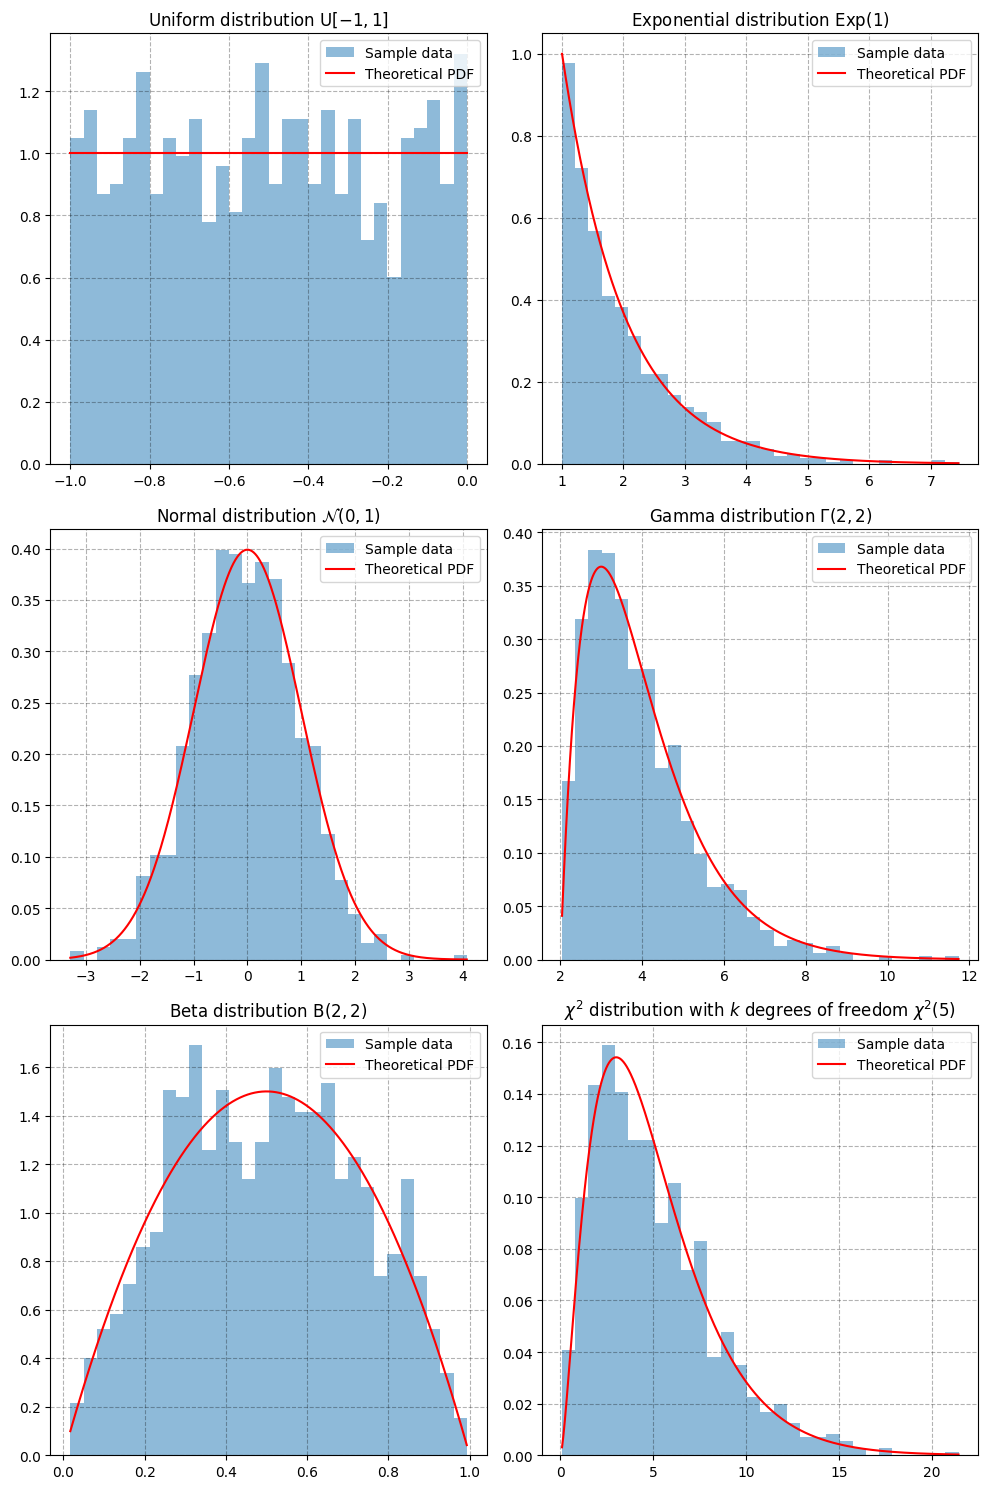

In [ ]:
# Define distributions and their parameters
distributions = [
    ("Uniform distribution $\\operatorname{U}[-1, 1]$", stats.uniform, (-1, 1)),
    ("Exponential distribution $\\operatorname{Exp}(1)$", stats.expon, (1,)),
    ("Normal distribution $\\mathcal{N}(0, 1)$", stats.norm, (0, 1)),
    ("Gamma distribution $\\Gamma(2, 2)$", stats.gamma, (2, 2)),
    ("Beta distribution $\\operatorname{B}(2, 2)$", stats.beta, (2, 2)),
    ("$\\chi^2$ distribution with $k$ degrees of freedom $\\chi^2(5)$", stats.chi2, (5,))
]

# Setup the figure and axes for a 2x3 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Adjust figsize according to your needs
axs = axs.flatten()  # Flatten the array to easily iterate over it

for ax, (name, dist, params) in zip(axs, distributions):
    # Generate sample data
    data = dist.rvs(*params, size=1000)
    # Generate points for PDF
    x = np.linspace(min(data), max(data), 1000)
    pdf = dist.pdf(x, *params)

    # Plot histogram of sample data
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Sample data')
    # Plot theoretical PDF
    ax.plot(x, pdf, 'r-', label='Theoretical PDF')
    ax.set_title(name)
    ax.legend()
    ax.grid(linestyle='--', color='black', alpha=0.3)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
